## Calcualte structural and sequnece identity between two sets 

In [1]:
import pandas as pd

from Bio import SeqIO

test_set = set(list(pd.read_csv('Low30_mmseq_ID_exp_subset.txt', sep='\t', header=None)[0].values))
train_seqs = []
test_seqs = []
for seq_record in SeqIO.parse("All_seqs_at_90_id.fasta", "fasta"):
    seq_id = seq_record.id.split('|')[1]
    if seq_id in test_set:
        test_seqs.append([seq_id, str(seq_record.seq)])
    else:
        train_seqs.append([seq_id, str(seq_record.seq)])

# Read in the ones 
test_seqs = pd.DataFrame(test_seqs, columns=['Entry', 'Sequence'])
train_seqs = pd.DataFrame(train_seqs, columns=['Entry', 'Sequence'])

print(len(test_seqs), len(train_seqs))

252 5355


In [2]:
test_seqs

,Entry,Sequence
0,A0A0B5LB55,MSTEKFTITEHLVPGSHIREYPGSTVNQEDVLKIHVKQYTPKREGP...
1,A0A2U9GGW3,MAPLGVSGLVGKLSTELEVDCDAEKYYNMYKHGEDVKKAVPHLCVD...
2,A2T3S5,MKVLALRHSVAQVYADTQVYVHDDTKDSYENAFLISNLTTHNILYL...
3,A5JTM5,MYEAIGHRVEDGVAEITIKLPRHRNALSVKAMQEVTDALNRAEEDD...
4,B3TMR8,MENPANANPIRVGVIGCADIAWRRALPALEAEPLTEVTAIASRRWD...
...,...,...
247,P38488,MQMPKTLRIRNGDKVRSTFSAQEYANRQARLRAHLAAENIDAAIFT...
248,P78067,MKRVSQMTALAMALGLACASSWAAELAKPLTLDQLQQQNGKAIDTR...
249,Q56148,MTTRMIILNGGSSAGKSGIVRCLQSVLPEPWLAFGVDSLIEAMPLK...
250,Q56694,MNPQTDNVFYATNAFTGEALPLAFPVHTEVEVNQAATAAAKVARDF...


# Quickly do BLAST to check the seq identity between the two sets...


In [3]:
# Remove from SwissProt
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')
from steps.sequence_search_blast import BLAST
from steps.save_step import Save
# Now we're going to save this as a fasta file 
fasta_label = f'Low30_mmseq_ID_exp_subset_train.fasta'
with open(fasta_label, 'w+') as fout:
    for entry, seq in train_seqs[['Entry', 'Sequence']].values:
        if entry not in test_set:
            fout.write(f'>{entry}\n{seq}\n')
        else:
            # Just making double sure no contamination
            print(f"{entry} in training set?")
# Do blast on this dataset 
# This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
# This contains the models and the data needed to run the tool
id_col = 'Entry'
seq_col = 'Sequence'
test_seqs << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl'))

['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmp3rurty7i/R3AgZJzDxt_db', '-q', '/tmp/tmp3rurty7i/R3AgZJzDxt_query.fasta', '-o', '/tmp/tmp3rurty7i/R3AgZJzDxt_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmp3rurty7i/R3AgZJzDxt_db -q /tmp/tmp3rurty7i/R3AgZJzDxt_query.fasta -o /tmp/tmp3rurty7i/R3AgZJzDxt_matches.tsv	
--------------------------------------------------------------------------------


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: Low30_mmseq_ID_exp_subset_train.fasta
Opening the database file...  [0.001s]
Loading sequences...  [0.008s]
Masking sequences...  [0.029s]
Writing sequences...  [0.001s]
Hashing sequences...  [0s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.004s]

Database sequences  5355
  Database letters  2195041
     Database hash  af5530a8efa5117c2130e2159a2377a9
        Total time  0.045000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates a

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmp3rurty7i
#Target sequences to report alignments for: 25
Opening the database...  [0.002s]
Database: /tmp/tmp3rurty7i/R3AgZJzDxt_db (type: Diamond database, sequences: 5355, letters: 2195041)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

,query,target,sequence identity,length,mismatch,gapopen,query start,query end,target start,target end,e-value,bitscore
0,A5JTM5,A4YI89,28.9,228,149,2,2,225,3,221,7.370000e-27,102.0
1,A5JTM5,Q5SKU3,34.3,207,129,6,8,211,3,205,1.340000e-23,94.0
2,A5JTM5,P52046,27.7,224,156,2,10,232,11,229,3.010000e-23,93.2
3,A5JTM5,Q5LLW6,29.8,215,135,5,10,213,18,227,8.640000e-21,86.7
4,A5JTM5,O53561,30.6,196,120,4,16,204,21,207,2.850000e-18,79.7
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Q56694,P94358,19.6,424,297,13,1,413,27,417,1.460000e-06,48.1
452,Q56694,Q56R04,24.9,257,146,9,25,263,43,270,1.970000e-06,47.8
453,Q56694,P56533,30.6,160,100,5,137,296,156,304,2.590000e-06,47.4
454,Q56694,Q92UV7,25.2,246,165,7,48,290,63,292,7.740000e-06,45.8


(array([ 1.,  2.,  6., 18., 25., 23.,  8.,  4.,  5.,  2.]),
 array([19.4 , 21.13, 22.86, 24.59, 26.32, 28.05, 29.78, 31.51, 33.24,
        34.97, 36.7 ]),
 <BarContainer object of 10 artists>)

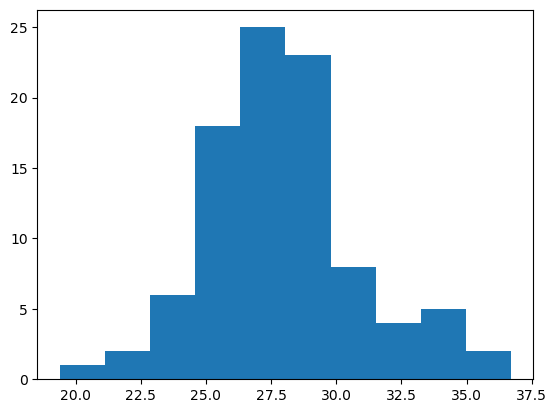

In [6]:
blast_df = pd.read_pickle(f'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl')
blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
blast_df.drop_duplicates('query', inplace=True)
import matplotlib.pyplot as plt

plt.hist(blast_df['sequence identity'].values)

# great looks good now let's download the uniprot structrues 

First just save each DF then we'll downloadn using the API from AlphaFold

In [8]:
test_seqs.to_csv('Low30_mmseq_ID_exp_subset_test.csv', index=False)
train_seqs.to_csv('Low30_mmseq_ID_exp_subset_train.csv', index=False)

# Look at structure similarity as well

In [14]:
# Get the pdbs ids for the test dataset
pdbs = pd.read_csv('pdb/pdb_ids.txt', sep='\t')

# We'll just download one of them but we keep track of all to remove from the search
pdbs = pdbs.dropna()
pdbs['pdb_download'] = [p.split(';')[0].lower() for p in pdbs['PDB'].values]
# Just download the ones in the test_df
pdbs_download = pdbs[pdbs['Entry'].isin(set(test_df['Entry'].values))]
# Save these to a text file
pdbs_download['pdb_download'].to_csv('pdb/files.txt', index=False, header=None)
with open('pdb/files.txt', 'w+') as fout:
    fout.write(', '.join(set(pdbs_download['pdb_download'].values)))
    fout.write('\n')
# Download ./batch_download.sh -f  files.txt -p


In [25]:
pdbs_download['pdb_path'] = [f'pdb/{p}.pdb' for p in pdbs_download['pdb_download'].values]

/tmp/ipykernel_3228989/2350054793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdbs_download['pdb_path'] = [f'pdb/{p}.pdb' for p in pdbs_download['pdb_download'].values]


In [23]:
# Unzip each of the pdbs
import os
for pdb in pdbs_download['pdb_download'].values[2:]:
    os.system(f'gzip -d pdb/{pdb}.pdb.gz')


gzip: pdb/5af2.pdb.gz: No such file or directory
gzip: pdb/1f8x.pdb.gz: No such file or directory


In [29]:
pdbs_download.to_csv('pdbs_download.csv', index=False)

In [30]:
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')

from steps.similarity_foldseek_step import FoldSeek
from steps.save_step import Save
import pandas as pd

# id_col: str, seq_col: str, proteinfer_dir: str,
output_dir = 'pdb/'
# foldseek_dir: str, pdb_column_name: str, reference_database: str
pdb_column_name = 'pdb_path'
# The foldseek database was created using the folldwing command in this location:
# foldseek databases PDB pdb tmp 
reference_database = '/disk1/share/software/foldseek/structures/pdb/pdb'
pdbs_download << (FoldSeek(pdb_column_name, reference_database) >> Save(f'pdb_files.pkl'))
                

easy-search pdb/7dbi.pdb pdb/6ka2.pdb pdb/5af2.pdb pdb/1jxz.pdb pdb/3rbv.pdb pdb/6nes.pdb pdb/7zu8.pdb pdb/7s3l.pdb pdb/3oa8.pdb pdb/5udq.pdb pdb/1zy9.pdb pdb/5n4b.pdb pdb/4au9.pdb pdb/5b08.pdb pdb/5wgr.pdb pdb/6pvf.pdb pdb/3geb.pdb pdb/1fc6.pdb pdb/1fsi.pdb pdb/2p8g.pdb pdb/1d8h.pdb pdb/3edy.pdb pdb/1fez.pdb pdb/1nc5.pdb pdb/1j58.pdb pdb/1i24.pdb pdb/1iq8.pdb pdb/2deo.pdb pdb/2xci.pdb pdb/2i5t.pdb pdb/2ypt.pdb pdb/3ujz.pdb pdb/4cyf.pdb pdb/1aro.pdb pdb/1ddt.pdb pdb/1ckq.pdb pdb/1dp0.pdb pdb/1b12.pdb pdb/1hq6.pdb pdb/2c5u.pdb pdb/1j53.pdb pdb/3uj3.pdb pdb/1avp.pdb pdb/1am7.pdb pdb/1ogs.pdb pdb/1az0.pdb pdb/1diz.pdb pdb/1eni.pdb pdb/1cpo.pdb pdb/1k0e.pdb pdb/1q2l.pdb pdb/1cg2.pdb pdb/5jbl.pdb pdb/2ns6.pdb pdb/1aa6.pdb pdb/1iov.pdb pdb/1lml.pdb pdb/1i9d.pdb pdb/1woj.pdb pdb/1ac5.pdb pdb/1xdo.pdb pdb/2dh5.pdb pdb/4px7.pdb pdb/6g9f.pdb pdb/4biu.pdb pdb/2io7.pdb pdb/5kzw.pdb pdb/1djg.pdb pdb/1a4i.pdb pdb/1c9u.pdb pdb/1g8t.pdb pdb/1f1z.pdb pdb/1d6m.pdb pdb/2o0h.pdb pdb/2z2n.pdb pdb/1a0g.pdb 

,Query,Target,Calpha coordinates of the query,Calpha coordinates of the target,TM-score of the alignment,TM-score normalized by the query length,TM-score normalized by the target length,Rotation matrix (computed to by TM-score),Translation vector (computed to by TM-score),Average LDDT of the alignment,LDDT per aligned position,Estimated probability for query and target to be homologous
0,2ai6_MODEL_2_A,2ozx-assembly1.cif.gz_A,1.000,125,0,0,1,125,1,125,2.851000e-20,700
1,2ai6_MODEL_2_A,2nmm-assembly4.cif.gz_A,0.941,120,7,0,2,121,1,113,4.369000e-18,615
2,2ai6_MODEL_2_A,2hw4-assembly1.cif.gz_A,0.901,122,11,0,1,122,3,116,1.585000e-17,601
3,2ai6_MODEL_2_A,2nmm-assembly4.cif.gz_B,0.925,121,8,0,1,121,4,115,1.097000e-17,600
4,2ai6_MODEL_2_A,2nmm-assembly4.cif.gz_C,0.897,117,11,0,6,122,1,106,3.979000e-17,574
...,...,...,...,...,...,...,...,...,...,...,...,...
355257,2ai6_MODEL_5_A,6d0k-assembly1.cif.gz_C,0.042,80,62,0,13,92,10,75,9.226000e+00,10
355258,2ai6_MODEL_5_A,7cnl-assembly2.cif.gz_B,0.099,96,70,0,17,95,108,203,8.692000e+00,10
355259,2ai6_MODEL_5_A,5b0v-assembly1.cif.gz_B,0.109,79,69,0,10,88,6,84,9.794000e+00,10
355260,2ai6_MODEL_5_A,6h04-assembly1.cif.gz_A,0.068,74,63,0,18,91,359,427,8.188000e+00,10


In [38]:
results = pd.read_pickle('pdb_files.pkl')
print(len(results))
# Now we need to drop any targets that were within the test set
# And only keep targets that were in the train set
# Now let's make sure all the ones in test and training can get omitted from our database
pdbs_to_omit = []
pdbs_to_keep = []
test_ids = set(test_df['Entry'].values)
train_ids = set(train_df['Entry'].values)

for entry, p in pdbs[['Entry', 'PDB']].values:
    for pdb in p.split(';'):
        if entry in test_ids: 
            pdbs_to_omit.append(pdb.lower())
        if entry in train_ids:
            pdbs_to_keep.append(pdb.lower())
        if entry in train_ids and entry in test_ids:
            print(entry)
len(pdbs_to_omit)

355262


1943

In [66]:
# Great now remove these from results
results['pdb_target'] = [c.split('-')[0] for c in results['Target'].values]
results = results[~results['pdb_id'].isin(set(pdbs_to_omit))]
results = results[~results['pdb_id'].isin(set(pdbs_to_keep))]
results

,Query,Target,Calpha coordinates of the query,Calpha coordinates of the target,TM-score of the alignment,TM-score normalized by the query length,TM-score normalized by the target length,Rotation matrix (computed to by TM-score),Translation vector (computed to by TM-score),Average LDDT of the alignment,LDDT per aligned position,Estimated probability for query and target to be homologous,pdb_id,pdb_query,Entry,pdb_target
241571,4f88_G,4f87-assembly1.cif.gz_B,1.000,62,0,0,8,69,1,62,5.621000e-11,435,4f87,4f88,Q7Y3F1,4f87
56917,4mct_C,6chv-assembly1.cif.gz_C,1.000,88,0,0,4,91,1,88,9.087000e-12,497,6chv,4mct,Q7A225,6chv
156627,5ohk_B,2mcn-assembly1.cif.gz_B,1.000,75,0,0,1,75,1,75,1.033000e-13,485,2mcn,5ohk,Q70CQ3,2mcn
296274,1g4u_R,1mh1-assembly1.cif.gz_A,1.000,179,0,0,2,180,4,182,1.512000e-33,1240,1mh1,1g4u,P74873,1mh1
177036,5iy4_C,6qcg-assembly1.cif.gz_A,1.000,251,0,0,1,251,1,251,5.324000e-44,1918,6qcg,5iy4,Q9H040,6qcg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287532,6cci_A,4v4w-assembly1.cif.gz_BE,0.186,42,32,0,100,141,4,43,1.869000e+00,29,4v4w,6cci,Q9LY46,4v4w
183438,8jkv_A,7crw-assembly1.cif.gz_B,0.181,65,52,0,17,81,65,129,2.844000e+00,36,7crw,8jkv,Q68CP4,7crw
15730,3ujz,2vmf-assembly2.cif.gz_B,0.164,106,84,0,38,139,198,303,5.514000e-01,28,2vmf,3ujz,O82882,2vmf
20088,2v9k,2rfk-assembly1.cif.gz_A,0.163,231,133,0,228,458,42,201,1.674000e-08,241,2rfk,2v9k,Q3MIT2,2rfk


In [41]:
# Great now lwte's check teh distribution of teh data
# Keep the top one
results = results.sort_values(by='Calpha coordinates of the query', ascending=False)
results.drop_duplicates('Query', inplace=True, keep='first')

(array([124., 261., 111.,  65.,  25.,  15.,   9.,  11.,  16.,  66.]),
 array([0.141 , 0.2269, 0.3128, 0.3987, 0.4846, 0.5705, 0.6564, 0.7423,
        0.8282, 0.9141, 1.    ]),
 <BarContainer object of 10 artists>)

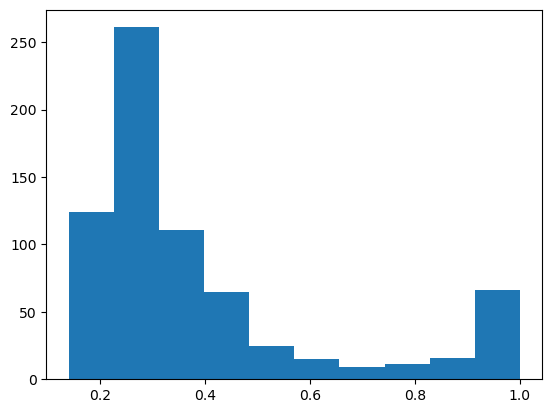

In [53]:
# For each pdb we want the entry 
pdbs_to_entries = {}
for entry, p in pdbs[['Entry', 'PDB']].values:
    for pdb in p.split(';'):
        pdb = pdb.lower()
        if entry in test_ids: 
            if pdbs_to_entries.get(pdb) is not None and pdb != '':
                print(entry, pdb, pdbs_to_entries[pdb])
            else:
                pdbs_to_entries[pdb] = entry

In [51]:
# Great now let's map back to the uniprot ID
results['pdb_query']

{'7dbi': 'A0A0B5LB55',
 '7dbl': 'A0A0B5LB55',
 '': 'Q8L9J9',
 '6ka2': 'A0A2U9GGW3',
 '6ka3': 'A0A2U9GGW3',
 '5af2': 'A2T3S5',
 '1jxz': 'A5JTM5',
 '1nzy': 'A5JTM5',
 '3rbv': 'B3TMR8',
 '3rc1': 'B3TMR8',
 '3rc2': 'B3TMR8',
 '3rc7': 'B3TMR8',
 '3rc9': 'B3TMR8',
 '3rcb': 'B3TMR8',
 '6nes': 'B8M9J8',
 '6net': 'B8M9J8',
 '6neu': 'B8M9J8',
 '6nev': 'B8M9J8',
 '7zu8': 'C0HLV2',
 '7zva': 'C0HLV2',
 '7zvb': 'C0HLV2',
 '7zvc': 'C0HLV2',
 '7s3l': 'C0SPC1',
 '3oa8': 'D7A6E5',
 '3ocd': 'D7A6E5',
 '5udq': 'F9UST4',
 '5udr': 'F9UST4',
 '5uds': 'F9UST4',
 '5udt': 'F9UST4',
 '5udu': 'F9UST4',
 '5udv': 'F9UST4',
 '5udw': 'F9UST4',
 '5udx': 'F9UST4',
 '5unm': 'F9UST4',
 '6b2m': 'F9UST4',
 '6b2o': 'F9UST4',
 '6dg3': 'F9UST4',
 '6utp': 'F9UST4',
 '6utq': 'F9UST4',
 '6utr': 'F9UST4',
 '6utt': 'F9UST4',
 '1zy9': 'G4FEF4',
 '5m0x': 'G4FEF4',
 '5m12': 'G4FEF4',
 '5m16': 'G4FEF4',
 '5m1i': 'G4FEF4',
 '6gta': 'G4FEF4',
 '6gvd': 'G4FEF4',
 '6gwf': 'G4FEF4',
 '6gwg': 'G4FEF4',
 '6gx8': 'G4FEF4',
 '5n4b': 'H2E7Q8',


In [55]:
# Map both these sets back
results['pdb_query'] = [q.split('_')[0] for q in results['Query'].values]
results['Entry'] = [pdbs_to_entries.get(q) for q in results['pdb_query'].values]
results.drop_duplicates('Entry', inplace=True)
#results[results['Calpha coordinates of the query'] < 0.5]

(array([57., 88., 34., 15., 12., 10.,  5.,  4.,  4., 21.]),
 array([0.162 , 0.2458, 0.3296, 0.4134, 0.4972, 0.581 , 0.6648, 0.7486,
        0.8324, 0.9162, 1.    ]),
 <BarContainer object of 10 artists>)

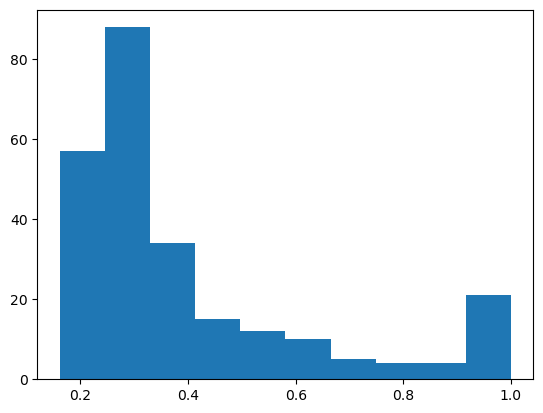

In [57]:
import matplotlib.pyplot as plt

plt.hist(results['Calpha coordinates of the query'].values)

In [63]:
len(results[results['Calpha coordinates of the query'] > 0.5])

55

In [64]:
len(results[results['Calpha coordinates of the query'] < 0.5])

194

In [68]:
low_structure_homology = results[results['Calpha coordinates of the query'] < 0.5]
low_structure_homology.rename(columns={'Calpha coordinates of the query': 'homology'}, inplace=True)
low_structure_homology[['pdb_target', 'pdb_query', 'Entry', 'homology']].to_csv('Low30_mmseq_ID_exp_subset_test_foldseek.csv', index=False)

/tmp/ipykernel_3228989/1554724128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_structure_homology.rename(columns={'Calpha coordinates of the query': 'homology'}, inplace=True)


(array([ 8., 26., 47., 37., 26.,  9., 13., 13.,  7.,  8.]),
 array([0.162 , 0.1944, 0.2268, 0.2592, 0.2916, 0.324 , 0.3564, 0.3888,
        0.4212, 0.4536, 0.486 ]),
 <BarContainer object of 10 artists>)

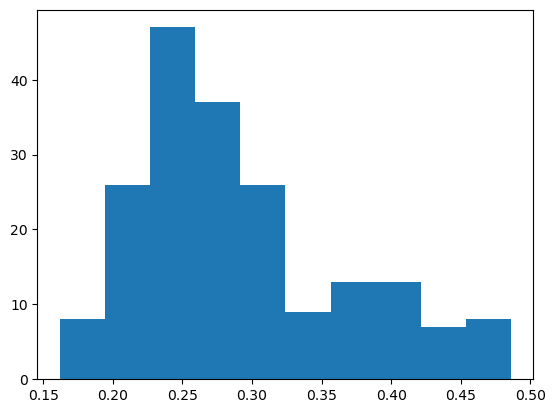

In [70]:
import matplotlib.pyplot as plt

plt.hist(low_structure_homology['homology'].values)

In [2]:
# read in the pdbs from AF2 
import pandas as pd

train_df = pd.read_csv('Low30_mmseq_ID_exp_subset_train.csv')
train_df['label'] = 'train'

test_df = pd.read_csv('Low30_mmseq_ID_exp_subset_test.csv')
test_df['label'] = 'test'

df = pd.concat([train_df, test_df])
df['pdb'] = [f'structures/{p}.pdb' for p in df['Entry'].values]
